In [35]:
import pandas as pd

df = pd.read_excel('Wins_Over_Time.xlsx')   

In [ ]:
# for each row, subtract the lowest value from all the values in the row
df.iloc[:, 1:] = df.iloc[:, 1:].sub(df.iloc[:, 1:].min(axis=1), axis=0)
# format dat as Oct-22
df['Day'] = pd.to_datetime(df['Day']).dt.strftime('%b-%d')


In [37]:
df

,Day,Chase,Bryce,Zach
0,Oct-21,0,0,0
1,Oct-22,0,0,2
2,Oct-23,2,0,4
3,Oct-24,2,0,5
4,Oct-25,3,0,8
5,Oct-26,4,0,8
6,Oct-27,5,0,6
7,Oct-28,7,0,9
8,Oct-29,6,0,8
9,Oct-30,7,0,12


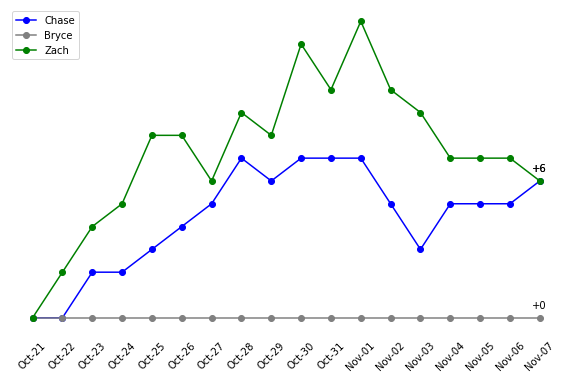

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Day'], df['Chase'], label='Chase', marker='o', color='blue')
plt.plot(df['Day'], df['Bryce'],  label='Bryce', marker='o', color='grey')
plt.plot(df['Day'], df['Zach'], label='Zach', marker='o', color='green')
plt.yticks([])
plt.xticks(rotation=45)
for i, txt in enumerate(df['Chase']):
    if i == len(df)-1:
        plt.annotate("+"+str(txt), (df['Day'][i], df['Chase'][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(df['Zach']):
    if i == len(df)-1:
        plt.annotate("+"+str(txt), (df['Day'][i], df['Zach'][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(df['Bryce']):
    if i == len(df)-1:
        plt.annotate("+"+str(txt), (df['Day'][i], df['Bryce'][i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.box(False)
plt.legend(loc='upper left')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.show()


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://www.espn.com/nba/schedule'
headers = {
    'User-Agent': 'Mozilla/5.0'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
# Locate the schedule table
matchups = []

schedule_table = soup.find('div', class_='ScheduleTables')

if schedule_table:
    # Find each matchup row
    rows = schedule_table.find_all('tr', class_='Table__TR--sm')

    for row in rows:
        # Extract team names
        teams = row.find_all('a', class_='AnchorLink')
        away_team = teams[1].text.strip() if teams else None
        home_team = teams[3].text.strip() if len(teams) > 1 else None
        
        # Extract time
        time = row.find('td', class_='date__col').text.strip() if row.find('td', class_='date__col') else None
        
        # Extract odds (e.g., point spread)
        odds_info = row.find('div', class_='Odds__Message')
        odds = odds_info.text.strip() if odds_info else None

        # Store each matchup as a dictionary
        matchups.append({
            'away_team': away_team,
            'home_team': home_team,
            'time': time,
            'odds': odds.split('O')[0] if odds else None,
        })

# Print the extracted matchups
for matchup in matchups:
    print(matchup)

{'away_team': 'Cleveland', 'home_team': 'Chicago', 'time': '8:00 PM', 'odds': 'Line: CLE -8.5'}
{'away_team': 'Washington', 'home_team': 'Houston', 'time': '8:00 PM', 'odds': 'Line: H'}
{'away_team': 'Brooklyn', 'home_team': 'New Orleans', 'time': '8:00 PM', 'odds': 'Line: BKN -1.5'}
{'away_team': 'LA', 'home_team': 'Oklahoma City', 'time': '8:00 PM', 'odds': 'Line: '}
{'away_team': 'Sacramento', 'home_team': 'San Antonio', 'time': '8:00 PM', 'odds': 'Line: SAC -2.5'}
